# Topology of the Swiss Parliament

In [1]:
from itertools import combinations

import mapper
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The 'cmappertools' module could not be imported.
The 'cmappertools' module could not be imported.
Intrinsic metric is not available.
The 'cmappertools' module could not be imported.


Results from all votes in the Swiss parlament can be downloaded from https://www.parlament.ch/en/ratsbetrieb/abstimmungen/abstimmungs-datenbank-nr.

In [2]:
raw = pd.read_excel('./5012-218-fruehjahrssession-d.xlsx')

## Metric

In [3]:
def dist(a, b):
    common_votes = raw.loc[
        (raw[a] != 'Hat nicht teilgenommen') & (raw[b] != 'Hat nicht teilgenommen')].iloc[8:]
    n_common_votes = common_votes.shape[0]
    if n_common_votes == 0:
        return 1
    else:
        return 1 - sum(common_votes[a] == common_votes[b]) / common_votes.shape[0]

In [4]:
councillors = [col for col in raw.columns if isinstance(col, int)]
n_councillors = len(councillors)
dists = np.empty(n_councillors * (n_councillors - 1) // 2)
for i, (a, b) in enumerate(combinations(councillors, 2)):
    dists[i] = dist(a, b)

## Filters

In [5]:
def dist_to(a):
    dist_to = np.empty(n_councillors)
    for i, couns in enumerate(councillors):
        dist_to[i] = dist(a, couns)
    return dist_to

dist_to_badran = dist_to(2762)
dist_to_koeppel = dist_to(3082)
dist_to_pfister = dist_to(2623)

## Mapper

Number of observations: 203.
There are 219 nodes.


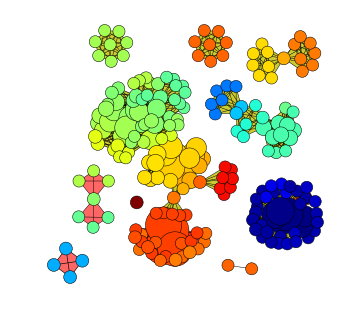

In [6]:
mapper_output = mapper.mapper(
    dists, np.vstack([dist_to_koeppel, dist_to_pfister, dist_to_badran]).transpose(), 
    mapper.cover.cube_cover_primitive(), mapper.cutoff.biggest_gap(), verbose=False)
node_color = mapper_output.postprocess_node_color(None, dist_to_badran)
mapper_output.draw_2D(legend=False, node_color=node_color, node_labels='empty')
plt.show()

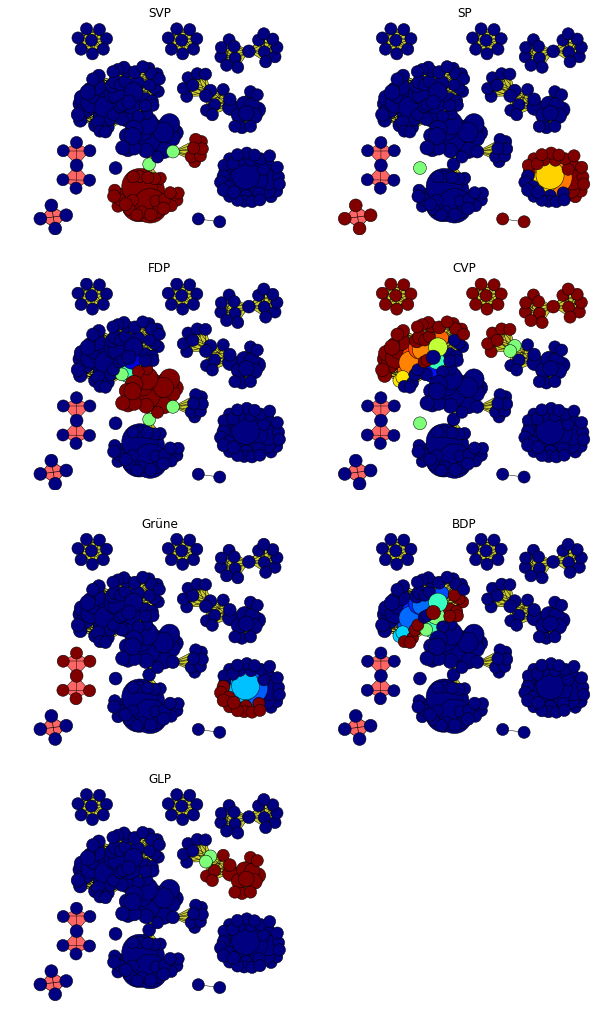

In [7]:
factions = {'SVP': 'V', 'SP': 'S', 'FDP': 'RL', 'CVP': 'C', 'Grüne': 'G', 'BDP': 'BD', 'GLP': 'GL'}

plt.figure(figsize=(10, 18))
for i, (faction, code) in enumerate(factions.items()):
    ax = plt.subplot(4, 2, i + 1)
    plt.title(faction)
    node_color = mapper_output.postprocess_node_color(None, 
        (raw[councillors].iloc[3] == code).as_matrix())
    mapper_output.draw_2D(ax, legend=False, node_color=node_color, 
                          node_labels='empty')

plt.show()